<a href="https://colab.research.google.com/github/deepu8900/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Classification → Predict categories? (e.g., heart disease: Yes/No) → Logistic Regression, Random Forest, XGBoost, SVM, etc.

# Regression → Predict numbers? (e.g., price, temperature) → Linear Regression, Random Forest Regressor, XGBoost Regressor.

# Clustering → Group similar things without labels? → K-Means, DBSCAN.

# Recommendation → Suggest items? → Collaborative Filtering, Matrix Factorization.

In [ ]:
house_data = sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
hp_dataframe = pd.DataFrame(house_data.data, columns = house_data.feature_names)
hp_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
hp_dataframe['price']= house_data.target
hp_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
hp_dataframe.shape

(20640, 9)

In [ ]:
hp_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
hp_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
correalation = hp_dataframe.corr()

<Axes: >

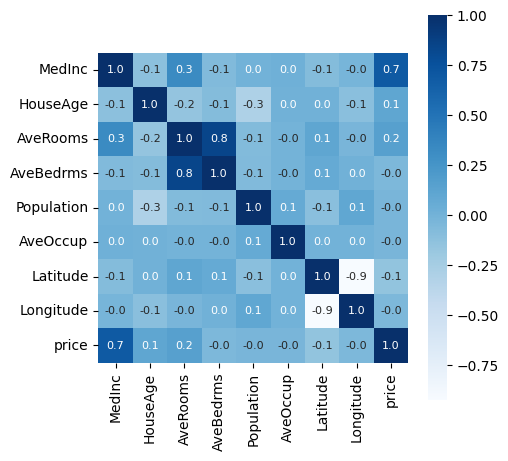

In [ ]:
mlt.figure(figsize=(5,5))
sns.heatmap(correalation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
# correalation → should be your correlation matrix (e.g., df.corr()).

# cbar=True → shows the color scale on the side.

# square=True → makes each cell a square for a cleaner look.

# fmt='.1f' → displays numbers with 1 decimal place.

# annot=True → writes the correlation values inside the squares.

# annot_kws={'size':8} → makes the annotation text size smaller (8 pt).

# cmap='Blues' → color theme from light to dark blue.



In [ ]:
x_train = hp_dataframe.drop(columns='price', axis=1)
y_train = hp_dataframe['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=2)

In [ ]:
model = XGBRegressor()
model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
train_prediction = model.predict(x_train)
score1 = metrics.r2_score(y_train, train_prediction)
print('R squared value = ', score1)

R squared value =  0.943650140819218


In [ ]:
score2 = metrics.mean_absolute_error(y_train, train_prediction)
print('Mean Absolute Error = ', score2)
# Regression → r2_score, mean_absolute_error, mean_squared_error

# Classification → accuracy_score, precision_score, recall_score, f1_score



Mean Absolute Error =  0.1933648700612105


In [ ]:
test_predition = model.predict(x_test)
score3 = metrics.r2_score(y_test, test_predition)
print('R squared value = ', score3)
score4 = metrics.mean_absolute_error(y_test, test_predition)
print('Mean Absolute Error = ', score4)

R squared value =  0.8338000331788725
Mean Absolute Error =  0.3108631800268186


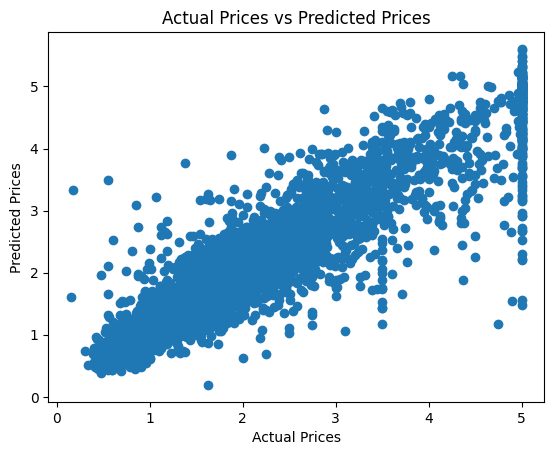

In [ ]:
mlt.scatter(y_test, test_predition)
mlt.xlabel('Actual Prices')
mlt.ylabel('Predicted Prices')
mlt.title('Actual Prices vs Predicted Prices')
mlt.show()

In [ ]:
import numpy as np

MedInc = float(input("Median Income: "))
HouseAge = float(input("House Age: "))
AveRooms = float(input("Average Rooms: "))
AveBedrms = float(input("Average Bedrooms: "))
Population = float(input("Population: "))
AveOccup = float(input("Average Occupancy: "))
Latitude = float(input("Latitude: "))
Longitude = float(input("Longitude: "))

input_data = (MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
prediction = model.predict(input_data_as_numpy_array)

predicted_price_dollars = prediction[0] * 100_000
print(f"Estimated House Price: ${predicted_price_dollars:,.2f}")

Median Income: 300000
House Age: 5
Average Rooms: 8
Average Bedrooms: 4
Population: 6
Average Occupancy: 1
Latitude: 57
Longitude: 43
Estimated House Price: $201,400.70
